In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loan_df = pd.read_csv("../Data/Loan_Default.csv")

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [2]:
loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())

loan_df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
loan_df = loan_df.assign(
    total_units = loan_df["total_units"].map({
        "1U": "1U",
        "2U": "2U+",
        "3U": "2U+",
        "4U": "2U+"}),
    loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


<Axes: ylabel='loan_amt_v_income'>

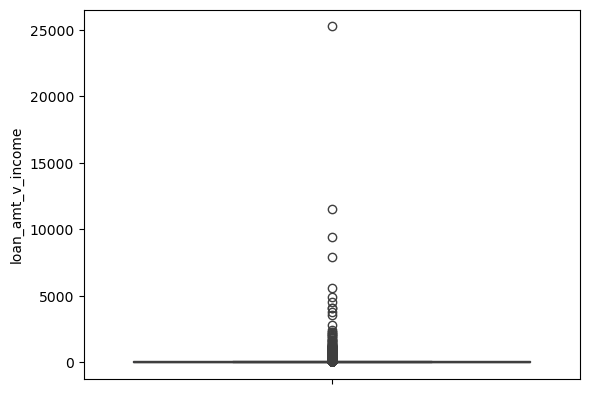

In [4]:
sns.boxplot(loan_df["loan_amt_v_income"])

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
loan_df

loan_df["loan_amt_v_income"] = (
    loan_df["loan_amt_v_income"]
    .fillna(loan_df["loan_amt_v_income"].mean())
    .replace([np.inf, -np.inf], loan_df["loan_amt_v_income"].median())
)

loan_df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_amt_v_income
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,148670.000000,148670.000000,133572.000000,148670.000000,124549.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932,56.244223
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6293.492004,115.875857,39.967603,0.430942,10.545435,92.292004
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000,0.599257
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3840.000000,599.000000,60.474860,0.000000,31.000000,37.009804
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,6000.000000,699.000000,75.135870,0.000000,39.000000,52.294686
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8280.000000,800.000000,86.184211,0.000000,45.000000,69.548287
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000,25275.000000


In [7]:
prep_loan_df = loan_df.drop([
    "year", 
     "ID", 
     "open_credit", 
    "construction_type", 
    "Security_Type", 
    "Secured_by"], 
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [8]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(prep_loan_df[["loan_amount", "income", "Gender", "loan_amt_v_income"]], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

print(f"Training Size: {X_train.shape[0]}, Test Size: {X_test.shape[0]}")

Training Size: 118936, Test Size: 29734


In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [11]:
knn.score(X_train_std, y_train)

0.7795873410910069

In [12]:
knn.score(X_test_std, y_test)

0.727820004035784

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, knn.predict(X_train_std))

array([[84430,  5163],
       [21052,  8291]])

<Axes: >

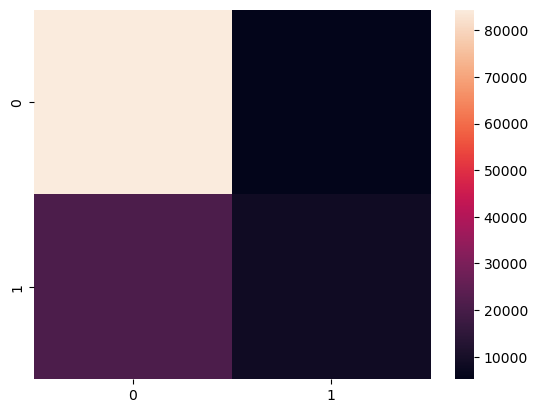

In [21]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_train, knn.predict(X_train_std)))

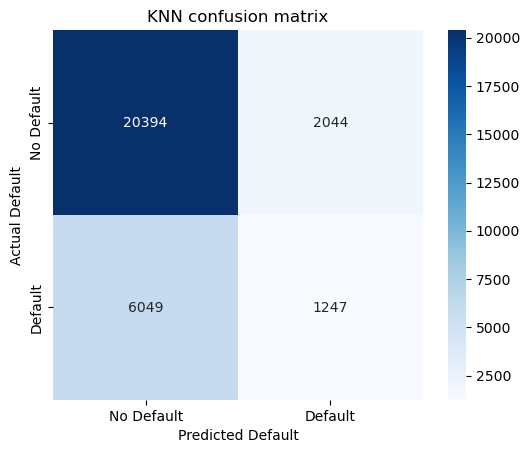

In [23]:
knn_confusion = confusion_matrix(y_test, knn.predict(X_test_std))
                                 
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Default", "Default"],        
    yticklabels=["No Default", "Default"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='KNN confusion matrix'
);

In [84]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(50, 100), "metric": ["minkowski", "manhattan"]}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 49}

In [89]:
knn = KNeighborsClassifier(n_neighbors=49, metric="manhattan")

knn.fit(X_train_std, y_train)

knn.score(X_train_std, y_train)


0.7685141588753616

In [90]:
knn.score(X_test_std, y_test)

0.7672697921571265

In [105]:
knn.predict_proba(np.array([ 0.46509119,  0.16254351, -0.03759113, -0.6213593 , -0.62969813,
         1.7133042 ]).reshape(1, -1))

array([[0.79591837, 0.20408163]])

In [104]:
X_test_std

array([[ 0.46509119,  0.16254351, -0.03759113, -0.6213593 , -0.62969813,
         1.7133042 ],
       [-0.13314044, -1.15275524, -0.04052942, -0.6213593 ,  1.58806252,
        -0.58366751],
       [ 0.95455344,  1.74688064, -0.27348812, -0.6213593 ,  1.58806252,
        -0.58366751],
       ...,
       [-1.32960371, -0.68442917, -0.25683477, -0.6213593 ,  1.58806252,
        -0.58366751],
       [-0.78575677, -0.56485656, -0.03663839, -0.6213593 ,  1.58806252,
        -0.58366751],
       [-0.89452616, -0.78407302,  0.18662463, -0.6213593 ,  1.58806252,
        -0.58366751]])

In [124]:
bins = np.linspace(0, 1, 11)

bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

/var/folders/f8/075hbnj13wb0f9yzh9k4nyz00000gn/T/ipykernel_56515/4165987531.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("predicted_probability")


<Axes: xlabel='predicted_probability', ylabel='Event Rate'>

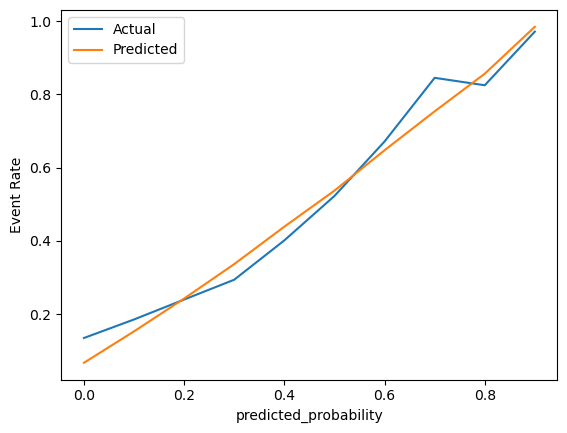

In [135]:
import numpy as np

bins = np.linspace(0, 1, 11)

# Create dataframe with Actual Classes & Predicted Probabilities
actual_vs_prob = (
    pd.DataFrame({
        "Actual": y_test,
        "Predicted": knn.predict_proba(X_test_std)[:, 1]})
)

# Create bins at increments of .1
actual_vs_prob["predicted_probability"] = (
    pd.cut(actual_vs_prob["Predicted"], 
    bins=bins,
    labels = bins[:-1].round(2)
          )
)

# Group by probability bins and calculate actual even rate & plot
(actual_vs_prob
 .groupby("predicted_probability")
 .agg({"Actual": "mean", "Predicted": "mean"})
 .plot
 .line(ylabel="Event Rate")
)

In [131]:
actual_vs_prob.head()

,Actual,Predicted,predicted_probability
69237,1,0.244898,0.2
134551,1,0.326531,0.3
140320,0,0.183673,0.1
21231,0,0.326531,0.3
17289,0,0.122449,0.1


In [133]:
(actual_vs_prob
 .groupby("predicted_probability", observed=True)
 .agg({"Actual": "mean", "Predicted": "mean"}))

,Actual,Predicted
predicted_probability,,
0.0,0.066493,0.066744
0.1,0.155155,0.152749
0.2,0.243353,0.242188
0.3,0.340092,0.336082
0.4,0.465111,0.439129
0.5,0.588793,0.539726
0.6,0.713018,0.647023
0.7,0.857678,0.755102
0.8,0.908088,0.854217
